# Source & Sink in a Freestream

The streamlines of a freestream with speed $U_\infty$ and angle of attack $\alpha$ are given by:

$$\psi_\text{freestream}\left(x,y\right) = U_\infty \left(y\cos\alpha - x\sin\alpha\right)$$

where its velocity components are:

$$u_\text{freestream}=U_\infty \cos\alpha$$ and $$v_\text{freestream}=U_\infty \sin\alpha$$.

Additionally, the stream function of a source flow located at $\left(x_\text{source},y_\text{source}\right)$ is:

$$\psi_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \arctan \left(\frac{y-y_\text{source}}{x-x_\text{source}}\right)$$

and the velocity components are:

$$u_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \frac{x-x_\text{source}}{\left(x-x_\text{source}\right)^2 + \left(y-y_\text{source}\right)^2}$$

$$v_\text{source}\left(x,y\right) = \frac{\sigma}{2\pi} \frac{y-y_\text{source}}{\left(x-x_\text{source}\right)^2 + \left(y-y_\text{source}\right)^2}$$

The streamlines of the combination of a freestream and a source flow are:

$$\psi = \psi_{freestream}+\psi_{source}$$
$$u = u_\text{freestream} + u_\text{source}$$
$$v = v_\text{freestream} + v_\text{source}$$

The stagnation points in the flow are points where the velocity is zero:

$$u = 0 , \quad v = 0$$

### Importing dependencies

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt

### Generating a mesh grid

In [2]:
N = 50                              # Number of points
x_start, x_end = -4.0, 4.0          # Boundaries in the x-direction
y_start, y_end = -2.0, 2.0          # Boundaries in the y-direction
x = np.linspace(x_start, x_end, N)  # Array with x-coordinates
y = np.linspace(y_start, y_end, N)  # Array with y-coordinates

X, Y = np.meshgrid(x, y)            # Mesh grid

### Defining functions to get the streams and the velocity components

In [3]:
def get_velocity_freestream(u_inf, alpha, X, Y):
    """Returns the velocity field of a freestream.
    
    Inputs:
    - U_inf: freestream speed.
    - alpha: angle of attack (in degrees) of the streamlines.
    - x, y: mesh grid
    """
    u_freestream = u_inf * np.cos(np.deg2rad(alpha)) * np.ones((len(X), len(Y)), dtype=float)
    v_freestream = u_inf * np.sin(np.deg2rad(alpha)) * np.ones((len(X), len(Y)), dtype=float)
    
    return u_freestream, v_freestream

In [4]:
def get_strem_function_freestream(u_inf, alpha, X, Y):
    """Returns the stream function generated by a freestream.
    
    Inputs:
    - U_inf: freestream speed.
    - alpha: angle of attack (in degrees) of the streamlines.
    - x, y: mesh grid
    """
    psi_freestream = u_inf * (Y*np.cos(np.deg2rad(alpha)) - X*np.sin(np.deg2rad(alpha)))
    
    return psi_freestream

In [5]:
def get_velocity_SourceSink(strength, xs, ys, X, Y):
    """Returns the velocity field generated by a source/sink.
    
    Inputs:
    - strength: strength of the source (positive number) or the sink (negative number).
    - xs, yx: coordinates of the source/sink.
    - x, y: mesh grid.
    """
    
    u = strength/(2*np.pi) * (X-xs)/((X-xs)**2 + (Y-ys)**2)
    v = strength/(2*np.pi) * (Y-ys)/((X-xs)**2 + (Y-ys)**2)
    
    return u, v

In [6]:
def get_stream_function_SourceSink(strength, xs, ys, X, Y):
    """Returns the stream function generated by a source/sink.
    
    Inputs:
    - strength: strength of the source (positive number) or the sink (negative number).
    - xs, yx: coordinates of the source/sink.
    - x, y: mesh grid.
    """
    
    psi = strength/(2*np.pi) * np.arctan2((Y-ys), (X-xs))
    
    return psi

### Computing the flow source

In [7]:
strength_source = 5.0            # strength of the source
x_source, y_source = -1.0, 0.0   # location of the source

# Computing the velocity field
u_source, v_source = get_velocity_SourceSink(strength_source, x_source, y_source, X, Y)

# Computing the stream-function
psi_source = get_stream_function_SourceSink(strength_source, x_source, y_source, X, Y)

### Computing the freestream values

In [8]:
u_inf = 1.0                 # freestream speed
alpha = 0                   # angle of attack of the streamlines

# Computing the velocity field
u_freestream, v_freestream = get_velocity_freestream(u_inf, alpha, X, Y)

# Computing the stream-function
psi_freestream = get_strem_function_freestream(u_inf, alpha, X, Y)

### Computing general result by superposition principles

In [9]:
u = u_freestream + u_source
v = v_freestream + v_source
psi = psi_freestream + psi_source

### Plotting the result of a source in a uniform flow

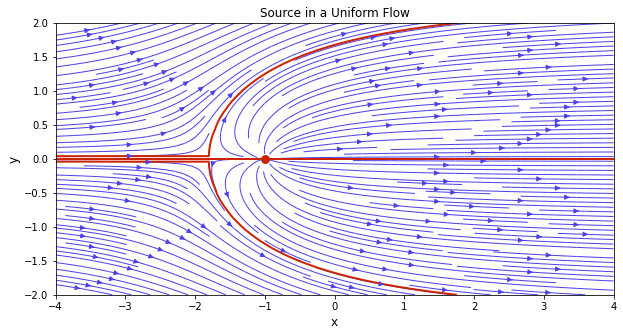

In [10]:
# Plotting the streamlines
x_size = 10
y_size = (y_end-y_start)/(x_end-x_start)*x_size
plt.figure(figsize=(x_size, y_size))
plt.title("Source in a Uniform Flow")
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, color="#4B3FE8", linewidth=1, arrowsize=1, arrowstyle="-|>")
plt.scatter(x_source, y_source, s=80, color="#CD2305", marker='o', linewidth=0)

# Adding the dividing line of the flow
plt.contour(X, Y, psi, 
            levels=[-strength_source/2, 0, strength_source/2], 
            colors='#CD2305', linewidths=2, linestyles='solid')
plt.show()

### Source-sink pair in a uniform flow

In [11]:
# Computing the sink 
strength_sink = -5.0            # strength of the sink
x_sink, y_sink = 1.0, 0.0       # location of the sink

# Computing the velocity field
u_sink, v_sink = get_velocity_SourceSink(strength_sink, x_sink, y_sink, X, Y)

# Computing the stream-function
psi_sink = get_stream_function_SourceSink(strength_sink, x_sink, y_sink, X, Y)

In [12]:
# Updating the result with by superposition principles
u = u_freestream + u_source + u_sink
v = v_freestream + v_source + v_sink
psi = psi_freestream + psi_source + psi_sink

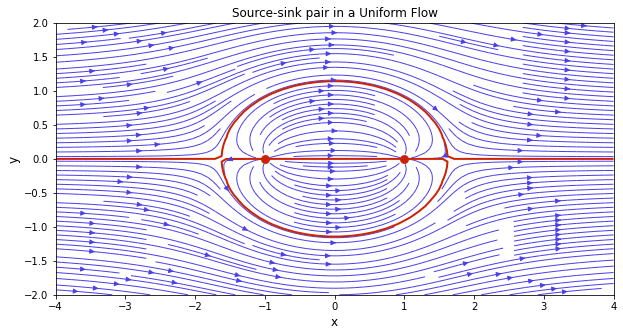

In [13]:
# Plotting the streamlines
x_size = 10
y_size = (y_end-y_start)/(x_end-x_start)*x_size
plt.figure(figsize=(x_size, y_size))
plt.title("Source-sink pair in a Uniform Flow")
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, color="#4B3FE8", linewidth=1, arrowsize=1, arrowstyle="-|>")
plt.scatter([x_source, x_sink], [y_source, y_sink], s=80, color="#CD2305", marker='o', linewidth=0)

# Adding the dividing line of the flow
plt.contour(X, Y, psi, levels=[0], colors='#CD2305', linewidths=2, linestyles='solid')
plt.show()

## Pressure coefficient

According Bernouilli's equation, the *coefficient of pressure* $C_p$, is given by:

$$C_p = \frac{p-p_\infty}{\frac{1}{2}\rho V_\infty^2}$$

$$C_p = 1 - \left(\frac{V}{V_\infty}\right)^2$$


In [14]:
# Computing the pressure coefficient field
cp = 1.0 - (u**2 + v**2) / u_inf**2

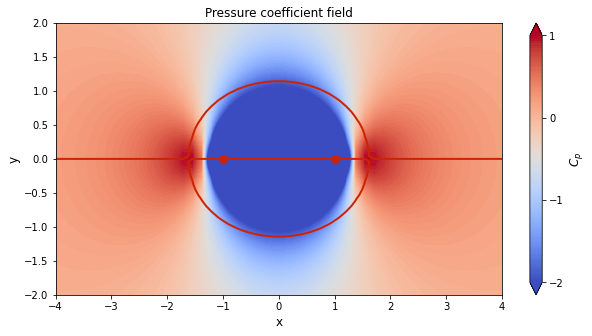

In [15]:
# Plotting the pressure coefficient field
x_size = 10
y_size = (y_end-y_start)/(x_end-x_start)*x_size
plt.figure(figsize=(x_size, y_size))
plt.title("Pressure coefficient field")
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)

contf = plt.contourf(X, Y, cp, levels=np.linspace(-2.0, 1.0, 100), extend="both", cmap="coolwarm")
cbar = plt.colorbar(contf)
cbar.set_label("$C_p$", fontsize=12)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])

plt.scatter([x_source, x_sink], [y_source, y_sink], s=80, color="#CD2305", marker='o', linewidth=0)
plt.contour(X, Y, psi, levels=[0], colors='#CD2305', linewidths=2, linestyles='solid')
plt.show()